In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load datasets
games = pd.read_csv('games.csv')
games_details = pd.read_csv('games_details.csv', low_memory=False)
players = pd.read_csv('players.csv')
ranking= pd.read_csv('ranking.csv')
teams = pd.read_csv('teams.csv')

In [ ]:
players

In [ ]:
games

In [ ]:
games_details

In [ ]:
ranking

In [ ]:
teams

In [ ]:
# Display basic information about each dataset
print("Games Dataset:")
print(games.info())
print("\nGames Details Dataset:")
print(games_details.info())
print("\nPlayers Dataset:")
print(players.info())
print("\nRanking Dataset:")
print(ranking.info())
print("\nTeams Dataset:")
print(teams.info())

Games Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 n

In [ ]:
print(games.describe())

            GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID        SEASON  \
count  2.665100e+04  2.665100e+04     2.665100e+04  26651.000000   
mean   2.175487e+07  1.610613e+09     1.610613e+09   2012.113879   
std    5.570189e+06  8.638670e+00     8.659299e+00      5.587031   
min    1.030000e+07  1.610613e+09     1.610613e+09   2003.000000   
25%    2.070001e+07  1.610613e+09     1.610613e+09   2007.000000   
50%    2.120076e+07  1.610613e+09     1.610613e+09   2012.000000   
75%    2.180005e+07  1.610613e+09     1.610613e+09   2017.000000   
max    5.210021e+07  1.610613e+09     1.610613e+09   2022.000000   

       TEAM_ID_home      PTS_home   FG_PCT_home   FT_PCT_home  FG3_PCT_home  \
count  2.665100e+04  26552.000000  26552.000000  26552.000000  26552.000000   
mean   1.610613e+09    103.455898      0.460735      0.760377      0.356023   
std    8.638670e+00     13.283370      0.056676      0.100677      0.111164   
min    1.610613e+09     36.000000      0.250000      0.143000      0.00

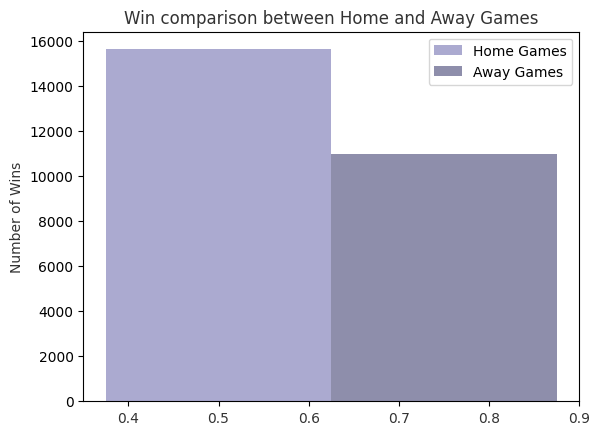

In [ ]:
# Plot a bar chart of team wins
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'games' is your DataFrame
wl_group = games.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

# do teams perform better when at home stadium?
# groupings and bar plot
x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

# Using the provided color palette
plt.bar(ti, x, width=0.25, color='#ABAAD0', label='Home Games')  # White
plt.bar(hor + 0.75, y, width=0.25, color='#8E8EAB', label='Away Games')  # Light Gray

plt.ylabel('Number of Wins', color='#333333')  # Dark grey for text
plt.xticks(color='#333333')  # Dark grey for ticks
plt.title('Win comparison between Home and Away Games', color='#333333')  # Dark grey for title
plt.legend()

plt.show()


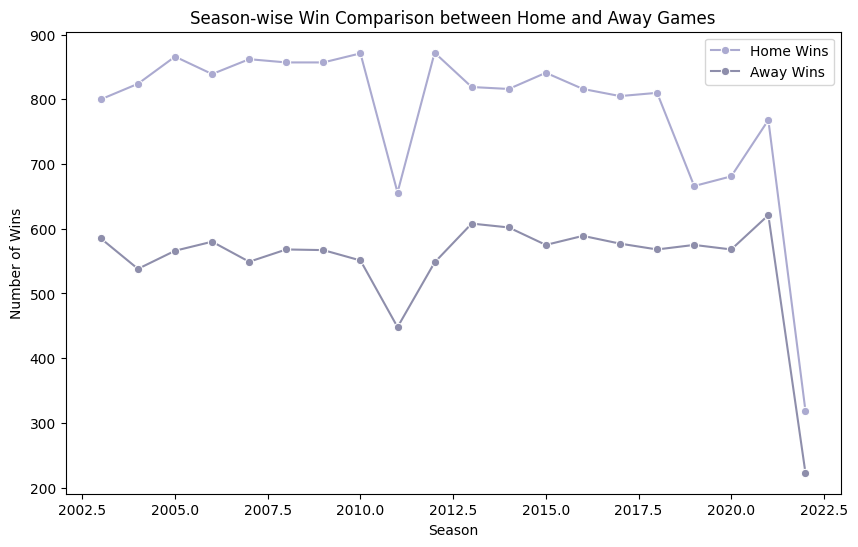

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'games_df' is the DataFrame with information about each game
# Assuming 'SEASON_x' is the column indicating the season
# Assuming 'HOME_TEAM_WINS' is the column indicating whether the home team wins (1 for Yes, 0 for No)

# Group by season and home wins
season_wise_wins = games.groupby(['SEASON', 'HOME_TEAM_WINS']).size().unstack()

# Plotting line plot for home wins vs. away wins over seasons
plt.figure(figsize=(10, 6))

# Use a line plot to show the trend
sns.lineplot(data=season_wise_wins, x='SEASON', y=1, marker='o', label='Home Wins', color='#ABAAD0')
sns.lineplot(data=season_wise_wins, x='SEASON', y=0, marker='o', label='Away Wins', color='#8E8EAB')

plt.xlabel('Season')
plt.ylabel('Number of Wins')

plt.title('Season-wise Win Comparison between Home and Away Games')
plt.legend()
plt.show()



<ipython-input-38-8207df9d0248>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_details_subset.dropna(inplace=True)


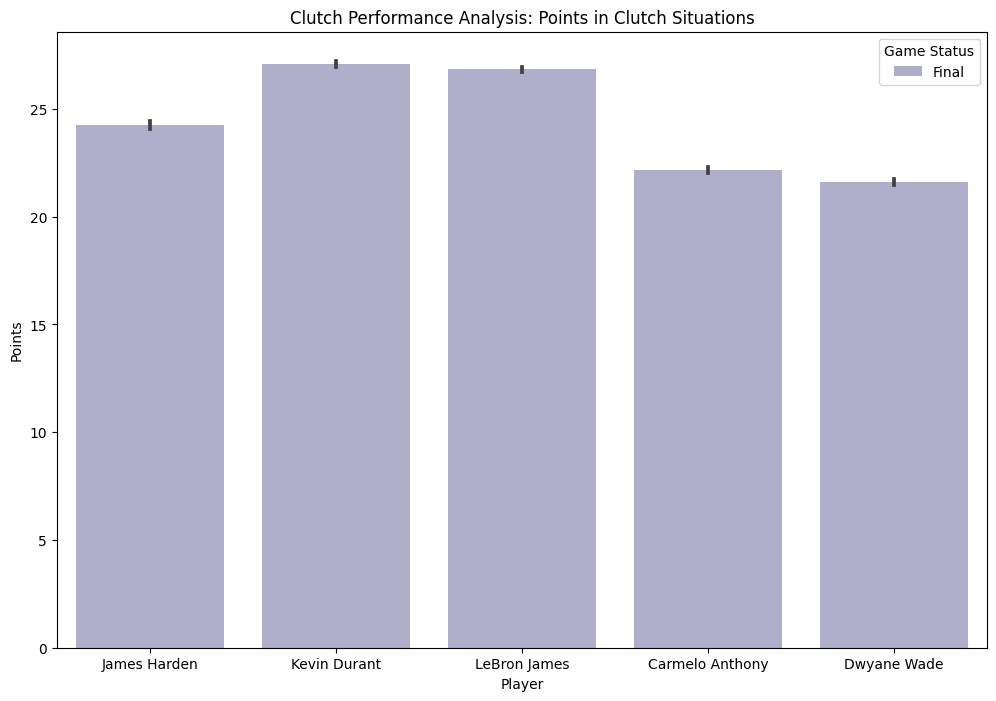

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example criteria for clutch situations: games with a score difference of 5 points or less in the last 5 minutes
clutch_games = games[(abs(games['PTS_home'] - games['PTS_away']) <= 5) & (games['GAME_STATUS_TEXT'] == 'Final')]
clutch_game_ids = clutch_games['GAME_ID'].unique()

# Subset relevant columns from games_details
required_columns_details = ['GAME_ID', 'PLAYER_ID', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'MIN']
games_details_subset = games_details[required_columns_details]

# Handling missing values in each dataset
games.dropna(inplace=True)
players.dropna(inplace=True)
games_details_subset.dropna(inplace=True)

# Merge datasets
merged_data = pd.merge(games, games_details_subset, left_on='GAME_ID', right_on='GAME_ID')
merged_data = pd.merge(merged_data, players, left_on='PLAYER_ID', right_on='PLAYER_ID')

# Define clutch players based on your criteria (e.g., players with high points in clutch situations)
clutch_players = merged_data.groupby('PLAYER_NAME')['PTS'].sum().nlargest(5).index

# Filter data for clutch players
clutch_players_data = merged_data[merged_data['PLAYER_NAME'].isin(clutch_players)]

# Using complementary shades for the bar plot
sns.set_palette(sns.color_palette(['#ABAAD0', '#C9C9DC']))

# Visualize clutch performance metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=clutch_players_data, x='PLAYER_NAME', y='PTS', hue='GAME_STATUS_TEXT')
plt.xlabel('Player')
plt.ylabel('Points')
plt.title('Clutch Performance Analysis: Points in Clutch Situations')
plt.legend(title='Game Status')
plt.show()


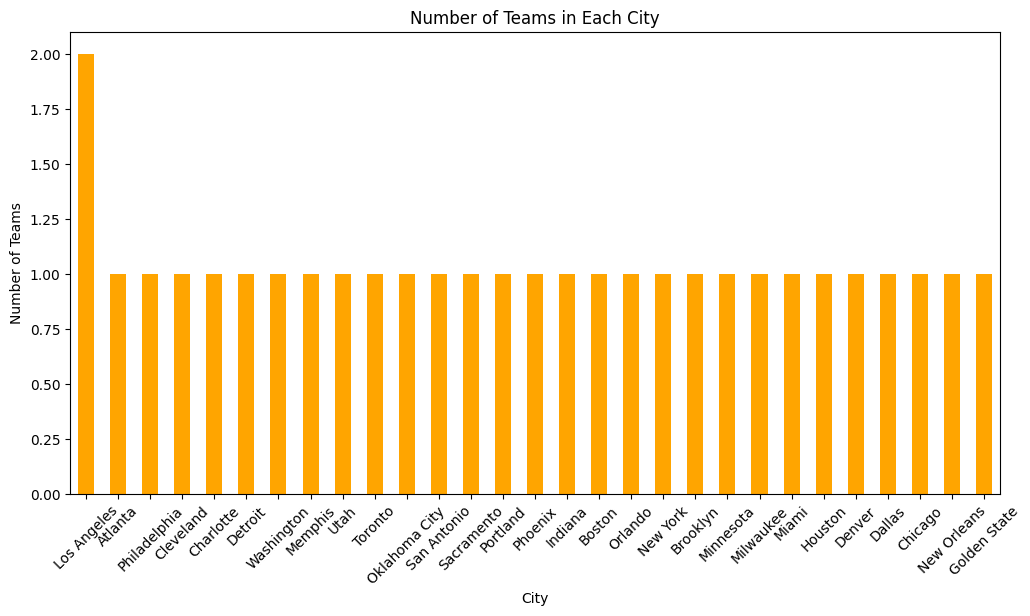

In [ ]:
# Plot a bar chart of the number of teams in each city
team_city_counts = teams['CITY'].value_counts()
plt.figure(figsize=(12, 6))
team_city_counts.plot(kind='bar', color='orange')
plt.title('Number of Teams in Each City')
plt.xlabel('City')
plt.ylabel('Number of Teams')
plt.xticks(rotation=45)
plt.show()